# Notebook just for making some publication/presentation ready plots

In [1]:
# Imports
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import glob
import netCDF4 as nc
import math
import datetime
import xarray as xr
import matplotlib.dates as mdates
import dask.array as da
from erddapy import ERDDAP
from netCDF4 import Dataset
import gsw
import cmocean.cm as cmo
import sys

## To import functions from Slocum-AD2CP GitHub repository, make this path the path to where the repo exists locally
sys.path.insert(0,'/home/jg1200/GitHub/Slocum-AD2CP/src/analysis/')
#sys.path.insert(0,'../src/analysis/')
from analysis import gsw_rho, profile_mld, get_erddap_dataset, grid_glider_data, dist_from_lat_lon

## Set some plotting formats
plt.style.use('seaborn-poster')
myFmtshort = mdates.DateFormatter('%m/%d\n%H:%M')
myFmtlong = mdates.DateFormatter('%m/%d/%y \n%H:%M')
myFmt = mdates.DateFormatter('%m/%d/%y')

## Plot transport time-series from RU29 2020 and RU36 2022 together

In [2]:
df29 = pd.read_csv('/home/jg1200/Data/GliderData/RU29/transport.csv')
df36 = pd.read_csv('/home/jg1200/Data/GliderData/RU36/transport.csv')
df36

,Unnamed: 0,transport_u,transport_v
0,0,-1.941463,-0.254457
1,1,-2.084861,0.263643
2,2,-1.623094,0.414784
3,3,-2.694441,0.604203
4,4,-2.367335,0.004448
5,5,-4.097117,0.276387


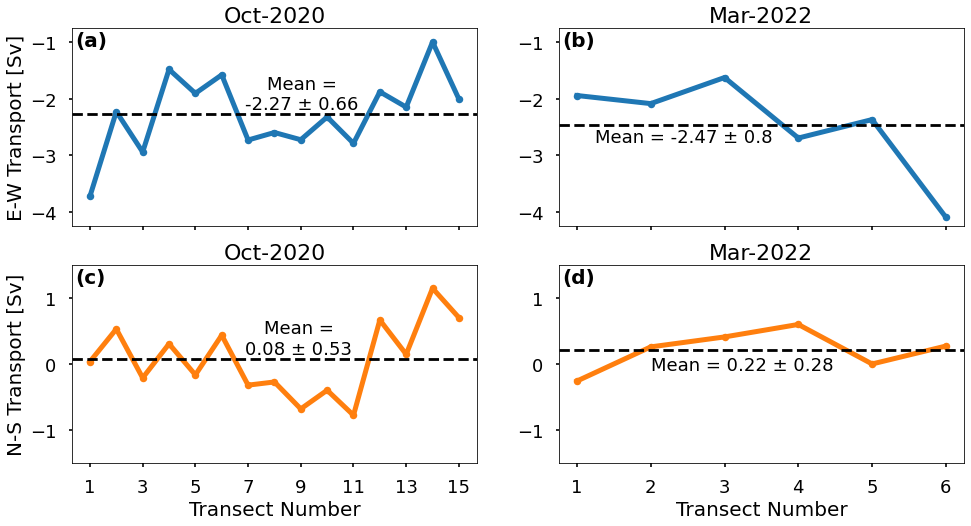

In [3]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(16,8))

axlist = [ax1,ax2,ax3,ax4]

font_size = 20
title_size = 22
mean_size = 18

ax1.plot(np.arange(1,16),df29.transport_u, linewidth=5,color='tab:blue')
ax1.plot(np.arange(1,16),df29.transport_u, '.',color='tab:blue',markersize=15)
ax1.set_ylabel('E-W Transport [Sv]',fontsize=font_size)
ax1.set_ylim(-4.25,-0.75)
ax1.axhline(y=np.nanmean(df29.transport_u), color='k', linestyle='--')
ax1.text(6.9, np.nanmean(df29.transport_u)+0.08, "Mean =\n%s \u00B1 %s" %(np.round(np.nanmean(df29.transport_u),2),np.round(np.nanstd(df29.transport_u),2)), size=mean_size,multialignment='center');
ax1.set_title('Oct-2020',fontsize=title_size)
ax1.xaxis.set_ticklabels([])
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_xticks(np.arange(1,16,2))
ax1.text(0.01,0.91,'(a)', transform=ax1.transAxes, size=font_size, weight='bold')


ax2.plot(np.arange(1,7),df36.transport_u, linewidth=5,color='tab:blue')
ax2.plot(np.arange(1,7),df36.transport_u, '.',color='tab:blue',markersize=15)
ax2.axhline(y=np.nanmean(df36.transport_u), color='k', linestyle='--')
ax2.set_ylim(-4.25,-0.75)
ax2.text(1.25, np.nanmean(df36.transport_u)-(0.075*4), "Mean = %s \u00B1 %s" %(np.round(np.nanmean(df36.transport_u),2),np.round(np.nanstd(df36.transport_u),2)), size=mean_size);
ax2.set_title('Mar-2022',fontsize=title_size)
ax2.xaxis.set_ticklabels([])
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_xticks(np.arange(1,7,1))
ax2.text(0.01,0.91,'(b)', transform=ax2.transAxes, size=font_size, weight='bold')


ax3.plot(np.arange(1,16),df29.transport_v, linewidth=5,color='tab:orange')
ax3.plot(np.arange(1,16),df29.transport_v, '.',color='tab:orange',markersize=15)
ax3.set_ylabel('N-S Transport [Sv]',fontsize=font_size)
ax3.set_xlabel('Transect Number',fontsize=font_size)
ax3.axhline(y=np.nanmean(df29.transport_v), color='k', linestyle='--')
ax3.set_ylim(-1.5,1.5)
ax3.text(6.9, np.nanmean(df29.transport_v)+0.08, "Mean =\n%s \u00B1 %s" %(np.round(np.nanmean(df29.transport_v),2),np.round(np.nanstd(df29.transport_v),2)), size=mean_size,multialignment='center');
ax3.set_title('Oct-2020',fontsize=title_size)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.set_xticks(np.arange(1,16,2))
ax3.text(0.01,0.91,'(c)', transform=ax3.transAxes, size=font_size, weight='bold')


ax4.plot(np.arange(1,7),df36.transport_v, linewidth=5,color='tab:orange')
ax4.plot(np.arange(1,7),df36.transport_v, '.',color='tab:orange',markersize=15)
ax4.set_xlabel('Transect Number',fontsize=font_size)
ax4.axhline(y=np.nanmean(df36.transport_v), color='k', linestyle='--')
ax4.set_ylim(-1.5,1.5)
ax4.text(2, np.nanmean(df36.transport_v)-(0.075*4), "Mean = %s \u00B1 %s" %(np.round(np.nanmean(df36.transport_v),2),np.round(np.nanstd(df36.transport_v),2)), size=mean_size);
ax4.set_title('Mar-2022',fontsize=title_size)
ax4.tick_params(axis='both', which='major', labelsize=18)
ax4.set_xticks(np.arange(1,7,1))
ax4.text(0.01,0.91,'(d)', transform=ax4.transAxes, size=font_size, weight='bold')

plt.savefig('/home/jg1200/Figures/RU29_2020_RU36_2022_EW_NS_Transport.png',dpi=300,facecolor='white',bbox_inches='tight')



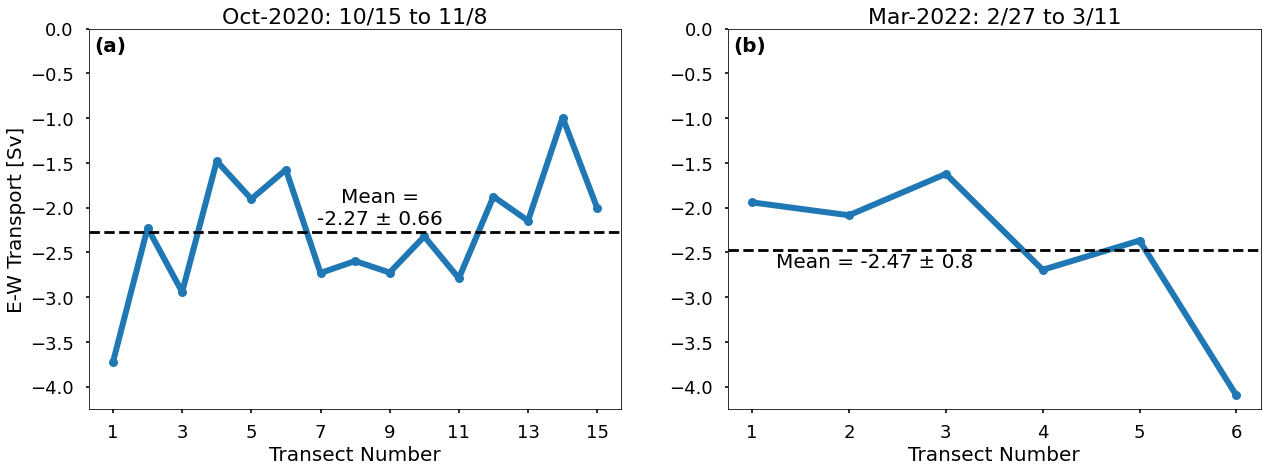

In [6]:
fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(21,7))

axlist = [ax1,ax2]

font_size = 20
title_size = 22
mean_size = 20

ax1.plot(np.arange(1,16),df29.transport_u, linewidth=6,color='tab:blue')
ax1.plot(np.arange(1,16),df29.transport_u, '.',color='tab:blue',markersize=18)
ax1.set_ylabel('E-W Transport [Sv]',fontsize=font_size)
ax1.set_ylim(-4.25,0)
ax1.axhline(y=np.nanmean(df29.transport_u), color='k', linestyle='--')
ax1.text(6.9, np.nanmean(df29.transport_u)+0.08, "Mean =\n%s \u00B1 %s" %(np.round(np.nanmean(df29.transport_u),2),np.round(np.nanstd(df29.transport_u),2)), size=mean_size,multialignment='center');
ax1.set_title('Oct-2020: 10/15 to 11/8',fontsize=title_size)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_xticks(np.arange(1,16,2))
ax1.text(0.01,0.94,'(a)', transform=ax1.transAxes, size=font_size, weight='bold')
ax1.set_xlabel('Transect Number',fontsize=font_size)


ax2.plot(np.arange(1,7),df36.transport_u, linewidth=6,color='tab:blue')
ax2.plot(np.arange(1,7),df36.transport_u, '.',color='tab:blue',markersize=18)
ax2.axhline(y=np.nanmean(df36.transport_u), color='k', linestyle='--')
ax2.set_ylim(-4.25,0)
ax2.text(1.25, np.nanmean(df36.transport_u)-0.2, "Mean = %s \u00B1 %s" %(np.round(np.nanmean(df36.transport_u),2),np.round(np.nanstd(df36.transport_u),2)), size=mean_size);
ax2.set_title('Mar-2022: 2/27 to 3/11',fontsize=title_size)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_xticks(np.arange(1,7,1))
ax2.text(0.01,0.94,'(b)', transform=ax2.transAxes, size=font_size, weight='bold')
ax2.set_xlabel('Transect Number',fontsize=font_size)

plt.savefig('/home/jg1200/Figures/RU29_2020_RU36_2022_EW_Transport.png',dpi=300,facecolor='white',bbox_inches='tight')



In [22]:
np.mean(pd.Series.append(df36.transport_u,df29.transport_u,ignore_index=True))

-2.3257662795657095

In [23]:
np.std(pd.Series.append(df36.transport_u,df29.transport_u,ignore_index=True))

0.7071204569953949

Text(0.5, 0, 'Transect Number')

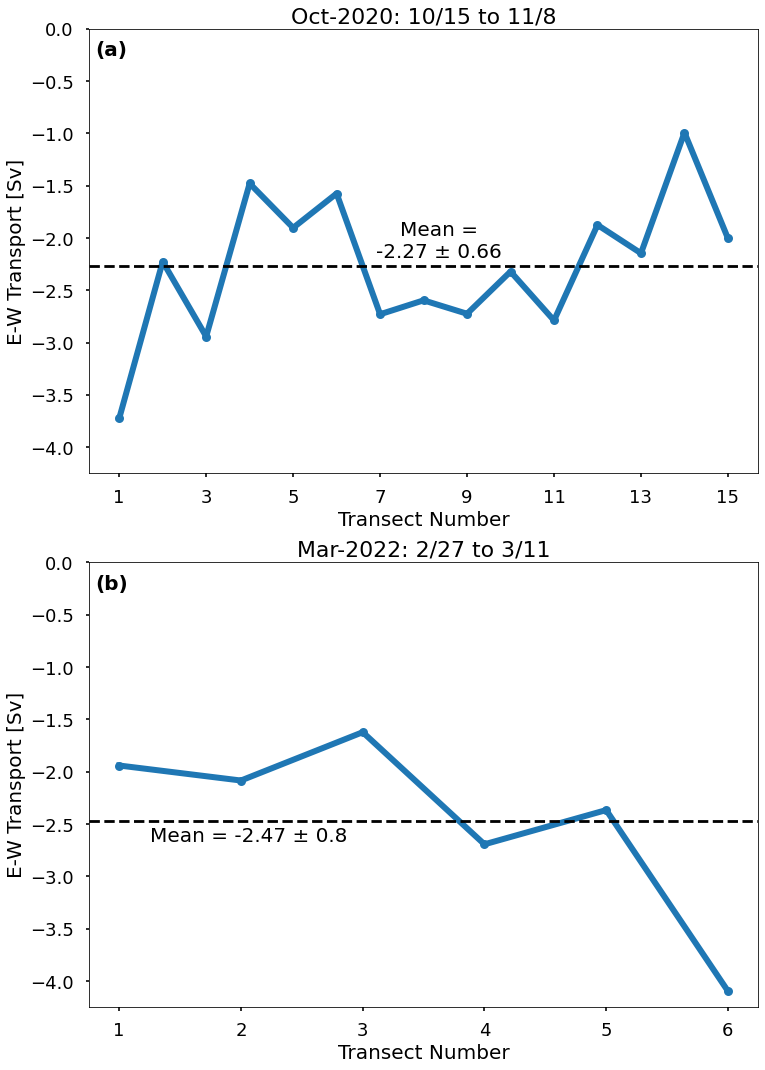

In [5]:
fig, ((ax1,ax2)) = plt.subplots(nrows=2,ncols=1, figsize=(12,18))

axlist = [ax1,ax2]

font_size = 20
title_size = 22
mean_size = 20

ax1.plot(np.arange(1,16),df29.transport_u, linewidth=6,color='tab:blue')
ax1.plot(np.arange(1,16),df29.transport_u, '.',color='tab:blue',markersize=18)
ax1.set_ylabel('E-W Transport [Sv]',fontsize=font_size)
ax1.set_ylim(-4.25,0)
ax1.axhline(y=np.nanmean(df29.transport_u), color='k', linestyle='--')
ax1.text(6.9, np.nanmean(df29.transport_u)+0.08, "Mean =\n%s \u00B1 %s" %(np.round(np.nanmean(df29.transport_u),2),np.round(np.nanstd(df29.transport_u),2)), size=mean_size,multialignment='center');
ax1.set_title('Oct-2020: 10/15 to 11/8',fontsize=title_size)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_xticks(np.arange(1,16,2))
ax1.text(0.01,0.94,'(a)', transform=ax1.transAxes, size=font_size, weight='bold')
ax1.set_xlabel('Transect Number',fontsize=font_size)


ax2.plot(np.arange(1,7),df36.transport_u, linewidth=6,color='tab:blue')
ax2.plot(np.arange(1,7),df36.transport_u, '.',color='tab:blue',markersize=18)
ax2.set_ylabel('E-W Transport [Sv]',fontsize=font_size)
ax2.axhline(y=np.nanmean(df36.transport_u), color='k', linestyle='--')
ax2.set_ylim(-4.25,0)
ax2.text(1.25, np.nanmean(df36.transport_u)-0.2, "Mean = %s \u00B1 %s" %(np.round(np.nanmean(df36.transport_u),2),np.round(np.nanstd(df36.transport_u),2)), size=mean_size);
ax2.set_title('Mar-2022: 2/27 to 3/11',fontsize=title_size)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_xticks(np.arange(1,7,1))
ax2.text(0.01,0.94,'(b)', transform=ax2.transAxes, size=font_size, weight='bold')
ax2.set_xlabel('Transect Number',fontsize=font_size)

#plt.savefig('/home/jg1200/Figures/RU29_2020_RU36_2022_EW_Transport.png',dpi=300,facecolor='white',bbox_inches='tight')



## Plot dominant water masses

In [7]:
ds_id = 'ru36-20220223T1807-profile-sci-rt'

## Load flight data
variables = ['depth', 'oxygen_concentration','temperature','salinity', 'time','density']

ru36gdf = get_erddap_dataset(ds_id, server='http://slocum-data.marine.rutgers.edu/erddap', variables = variables, filetype='dataframe')

ru36gdf.columns = variables


In [8]:
########## Convert variables for calculations
## Absolute salinity
SA = gsw.SA_from_SP(ru36gdf.salinity.values, ru36gdf.depth.values, -60, 18)
## Potential temperature
PT = gsw.pt0_from_t(SA, ru36gdf.temperature.values, ru36gdf.depth.values)
## Conservative temperature
CT = gsw.CT_from_t(SA, ru36gdf.temperature.values, ru36gdf.depth.values)
## Potential density
sigma0  = gsw.sigma0(SA,CT)+1000

ru36gdf.density = sigma0

In [9]:
# surface_ind       = np.where(ru36gdf.density.values < 1025.5)[0]
# salinity_max_ind  = np.where((ru36gdf.density.values >= 1025.5) & (ru36gdf.density.values < 1026.6))[0]
# central_water_ind = np.where((ru36gdf.density.values >= 1026.6) & (ru36gdf.density.values < 1030))[0]
# int_water_ind     = np.where((ru36gdf.density.values >= 1030))[0]

surface_ind       = np.where(ru36gdf.density.values < 1024.5)[0]
salinity_max_ind  = np.where((ru36gdf.density.values >= 1024.5) & (ru36gdf.density.values < 1026.3))[0]
central_water_ind = np.where((ru36gdf.density.values >= 1026.3) & (ru36gdf.density.values < 1027.1))[0]
int_water_ind     = np.where((ru36gdf.density.values >= 1027.1))[0]

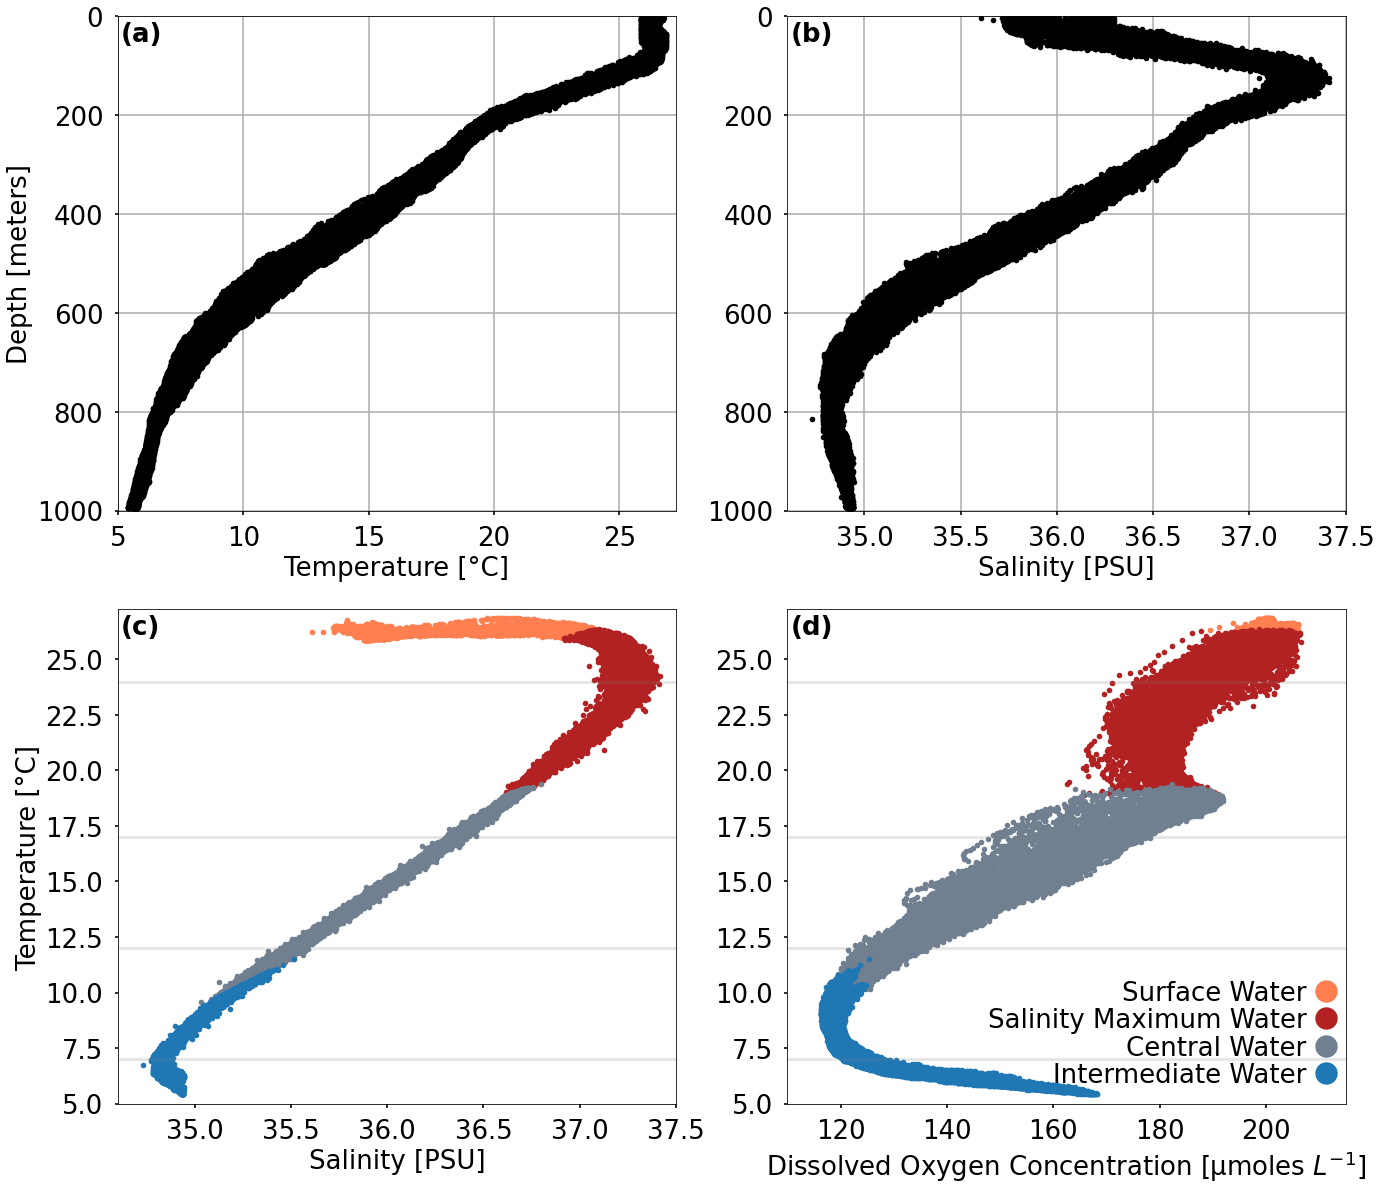

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(22, 20))

font_size = 26

axs[0,0].plot(ru36gdf.temperature,ru36gdf.depth,'.',color='black')
axs[0,0].grid()
axs[0,0].tick_params(axis='both', which='major', labelsize=font_size)
axs[0,0].set_xlabel('Temperature [°C]',fontsize=font_size)
axs[0,0].set_ylabel('Depth [meters]',fontsize=font_size)
axs[0,0].set_xlim(5,27.25)
axs[0,0].set_ylim(1000,0)
axs[0,0].text(0.005,0.95,'(a)', transform=axs[0,0].transAxes, size=font_size, weight='bold')

axs[0,1].plot(ru36gdf.salinity,ru36gdf.depth,'.',color='black')
axs[0,1].grid()
axs[0,1].tick_params(axis='both', which='major', labelsize=font_size)
axs[0,1].set_xlabel('Salinity [PSU]',fontsize=font_size)
axs[0,1].set_xlim(34.6,37.5)
axs[0,1].set_ylim(1000,0)
axs[0,1].text(0.005,0.95,'(b)', transform=axs[0,1].transAxes, size=font_size, weight='bold')

axs[1,0].plot(ru36gdf.salinity[surface_ind],ru36gdf.temperature[surface_ind],'.',label='Surface Water',color='coral')
axs[1,0].plot(ru36gdf.salinity[salinity_max_ind],ru36gdf.temperature[salinity_max_ind],'.',label='Salinity Maximum Water',color='firebrick')
axs[1,0].plot(ru36gdf.salinity[central_water_ind],ru36gdf.temperature[central_water_ind],'.',label='Central Water',color='slategrey')
axs[1,0].plot(ru36gdf.salinity[int_water_ind],ru36gdf.temperature[int_water_ind],'.',label='Intermediate Water',color='tab:blue')
axs[1,0].tick_params(axis='both', which='major', labelsize=font_size)
axs[1,0].set_ylabel('Temperature [°C]',fontsize=font_size)
axs[1,0].set_xlabel('Salinity [PSU]',fontsize=font_size)
axs[1,0].set_ylim(5,27.25)
axs[1,0].set_xlim(34.6,37.5)
axs[1,0].axhline(y=24, color='grey', alpha=0.2)
axs[1,0].axhline(y=17, color='grey', alpha=0.2)
axs[1,0].axhline(y=12, color='grey', alpha=0.2)
axs[1,0].axhline(y=7, color='grey', alpha=0.2)
axs[1,0].text(0.005,0.95,'(c)', transform=axs[1,0].transAxes, size=font_size, weight='bold')

axs[1,1].plot(ru36gdf.oxygen_concentration[surface_ind],ru36gdf.temperature[surface_ind],'.',label='Surface Water',color='coral')
axs[1,1].plot(ru36gdf.oxygen_concentration[salinity_max_ind],ru36gdf.temperature[salinity_max_ind],'.',label='Salinity Maximum Water',color='firebrick')
axs[1,1].plot(ru36gdf.oxygen_concentration[central_water_ind],ru36gdf.temperature[central_water_ind],'.',label='Central Water',color='slategrey')
axs[1,1].plot(ru36gdf.oxygen_concentration[int_water_ind],ru36gdf.temperature[int_water_ind],'.',label='Intermediate Water',color='tab:blue')
axs[1,1].tick_params(axis='both', which='major', labelsize=font_size)
axs[1,1].set_xlabel('Dissolved Oxygen Concentration [µmoles $L^{-1}$]',fontsize=font_size)
axs[1,1].set_xlim(110,215)
axs[1,1].set_ylim(5,27.25)
axs[1,1].axhline(y=24, color='grey', alpha=0.2)
axs[1,1].axhline(y=17, color='grey', alpha=0.2)
axs[1,1].axhline(y=12, color='grey', alpha=0.2)
axs[1,1].axhline(y=7, color='grey', alpha=0.2)
axs[1,1].legend(fontsize=font_size,markerscale=4,frameon=False,markerfirst=False,loc='lower right',handletextpad=-0.25, labelspacing=0.05,borderaxespad=0.2,bbox_to_anchor=(1.04, 0))
axs[1,1].text(0.005,0.95,'(d)', transform=axs[1,1].transAxes, size=font_size, weight='bold')


plt.savefig('/home/jg1200/Figures/RU36_Dominant_Water_Masses.png', bbox_inches='tight',dpi=300,facecolor='white')



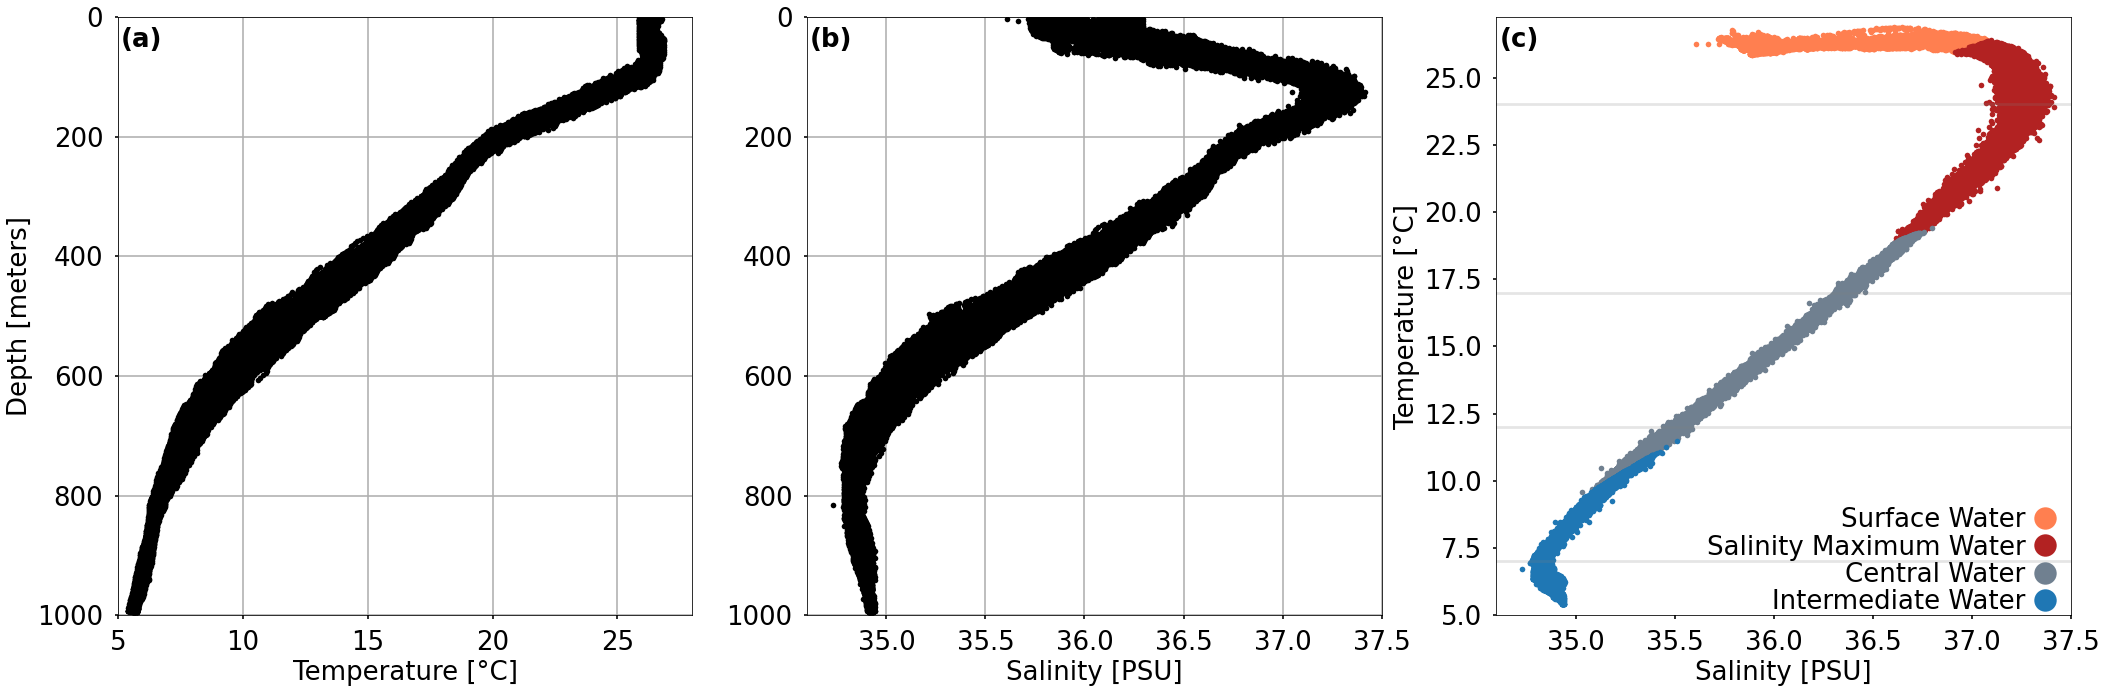

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(35, 11))

font_size = 26

axs[0].plot(ru36gdf.temperature,ru36gdf.depth,'.',color='black')
axs[0].grid()
axs[0].tick_params(axis='both', which='major', labelsize=font_size)
axs[0].set_xlabel('Temperature [°C]',fontsize=font_size)
axs[0].set_ylabel('Depth [meters]',fontsize=font_size)
axs[0].set_xlim(5,28)
axs[0].set_ylim(1000,0)
axs[0].text(0.005,0.95,'(a)', transform=axs[0].transAxes, size=font_size, weight='bold')

axs[1].plot(ru36gdf.salinity,ru36gdf.depth,'.',color='black')
axs[1].grid()
axs[1].tick_params(axis='both', which='major', labelsize=font_size)
axs[1].set_xlabel('Salinity [PSU]',fontsize=font_size)
axs[1].set_xlim(34.6,37.5)
axs[1].set_ylim(1000,0)
axs[1].text(0.005,0.95,'(b)', transform=axs[1].transAxes, size=font_size, weight='bold')

axs[2].plot(ru36gdf.salinity[surface_ind],ru36gdf.temperature[surface_ind],'.',label='Surface Water',color='coral')
axs[2].plot(ru36gdf.salinity[salinity_max_ind],ru36gdf.temperature[salinity_max_ind],'.',label='Salinity Maximum Water',color='firebrick')
axs[2].plot(ru36gdf.salinity[central_water_ind],ru36gdf.temperature[central_water_ind],'.',label='Central Water',color='slategrey')
axs[2].plot(ru36gdf.salinity[int_water_ind],ru36gdf.temperature[int_water_ind],'.',label='Intermediate Water',color='tab:blue')
axs[2].tick_params(axis='both', which='major', labelsize=font_size)
axs[2].set_ylabel('Temperature [°C]',fontsize=font_size)
axs[2].set_xlabel('Salinity [PSU]',fontsize=font_size)
axs[2].set_ylim(5,27.25)
axs[2].set_xlim(34.6,37.5)
axs[2].axhline(y=24, color='grey', alpha=0.2)
axs[2].axhline(y=17, color='grey', alpha=0.2)
axs[2].axhline(y=12, color='grey', alpha=0.2)
axs[2].axhline(y=7, color='grey', alpha=0.2)
axs[2].text(0.005,0.95,'(c)', transform=axs[2].transAxes, size=font_size, weight='bold')
axs[2].legend(fontsize=font_size,markerscale=4,frameon=False,markerfirst=False,loc='lower right',handletextpad=-0.25, labelspacing=0.05,borderaxespad=-0.4)

plt.savefig('/home/jg1200/Figures/RU36_Dominant_Water_Masses_no_O2.png', bbox_inches='tight',dpi=300,facecolor='white')




## Try it now with dataframes from T/S analysis

In [12]:
## load datasets
grid_ds_2020 = xr.open_dataset("/home/jg1200/Data/GliderData/RU29/RU29_2020_AD2CP_NC/Gridded/RU29_2020_Gridded_ADCP_CTD.nc")
grid_ds_2021a = xr.open_dataset("/home/jg1200/Data/GliderData/RU29/RU29_2021_Mission_1_AD2CP_NC/Gridded/RU29_2021_Mission_1_Gridded_ADCP_CTD.nc")
grid_ds_2021b = xr.open_dataset("/home/jg1200/Data/GliderData/RU29/RU29_2021_Mission_2_AD2CP_NC/Gridded/RU29_2021_Mission_2_Gridded_ADCP_CTD.nc")
grid_ds_2022 = xr.open_dataset("/home/jg1200/Data/GliderData/RU36/RU36_03_2022_ADCP/RU36_03_2022_Gridded_ADCP_CTD.nc")

## convert density to sigma0
grid_ds_2020.density.values = gsw.sigma0(grid_ds_2020.sal.values,grid_ds_2020.temp.values)+1000
grid_ds_2021a.density.values = gsw.sigma0(grid_ds_2021a.sal.values,grid_ds_2021a.temp.values)+1000
grid_ds_2021b.density.values = gsw.sigma0(grid_ds_2021b.sal.values,grid_ds_2021b.temp.values)+1000
grid_ds_2022.density.values = gsw.sigma0(grid_ds_2022.sal.values,grid_ds_2022.temp.values)+1000

## subset below surface layer
subset_ds_2020 = grid_ds_2020.where(grid_ds_2020.density >=1024.5)
subset_ds_2021a = grid_ds_2021a.where(grid_ds_2021a.density >=1024.5)
subset_ds_2021b = grid_ds_2021b.where(grid_ds_2021b.density >=1024.5)
subset_ds_2022 = grid_ds_2022.where(grid_ds_2022.density >=1024.5)

## load end-member profiles
df = pd.read_csv('/home/jg1200/Data/naw_saw_endmember_t_s_d_profile.csv')

## indexes for layers for plotting
surface_ind_2020       = np.where(grid_ds_2020.density.values < 1024.5)[0]
salinity_max_ind_2020  = np.where((grid_ds_2020.density.values >= 1024.5) & (grid_ds_2020.density.values < 1026.3))[0]
central_water_ind_2020 = np.where((grid_ds_2020.density.values >= 1026.3) & (grid_ds_2020.density.values < 1027.1))[0]
int_water_ind_2020     = np.where((grid_ds_2020.density.values >= 1027.1))[0]


surface_ind_2021a       = np.where(grid_ds_2021a.density.values < 1024.5)[0]
salinity_max_ind_2021a  = np.where((grid_ds_2021a.density.values >= 1024.5) & (grid_ds_2021a.density.values < 1026.3))[0]
central_water_ind_2021a = np.where((grid_ds_2021a.density.values >= 1026.3) & (grid_ds_2021a.density.values < 1027.1))[0]
int_water_ind_2021a     = np.where((grid_ds_2021a.density.values >= 1027.1))[0]


surface_ind_2021b       = np.where(grid_ds_2021b.density.values < 1024.5)[0]
salinity_max_ind_2021b  = np.where((grid_ds_2021b.density.values >= 1024.5) & (grid_ds_2021b.density.values < 1026.3))[0]
central_water_ind_2021b = np.where((grid_ds_2021b.density.values >= 1026.3) & (grid_ds_2021b.density.values < 1027.1))[0]
int_water_ind_2021b     = np.where((grid_ds_2021b.density.values >= 1027.1))[0]


surface_ind_2022       = np.where(grid_ds_2022.density.values < 1024.5)[0]
salinity_max_ind_2022  = np.where((grid_ds_2022.density.values >= 1024.5) & (grid_ds_2022.density.values < 1026.3))[0]
central_water_ind_2022 = np.where((grid_ds_2022.density.values >= 1026.3) & (grid_ds_2022.density.values < 1027.1))[0]
int_water_ind_2022     = np.where((grid_ds_2022.density.values >= 1027.1))[0]


/tmp/ipykernel_37051/2785159218.py:8: RuntimeWarning: Mean of empty slice
  axs[0,0].plot(np.nanmean(grid_ds_2020.temp,axis=(1,2)),grid_ds_2020.depth,'.',color='black')
/tmp/ipykernel_37051/2785159218.py:20: RuntimeWarning: Mean of empty slice
  axs[0,1].plot(np.nanmean(grid_ds_2020.sal,axis=(1,2)),grid_ds_2020.depth,'.',color='black')


NameError: name 's' is not defined

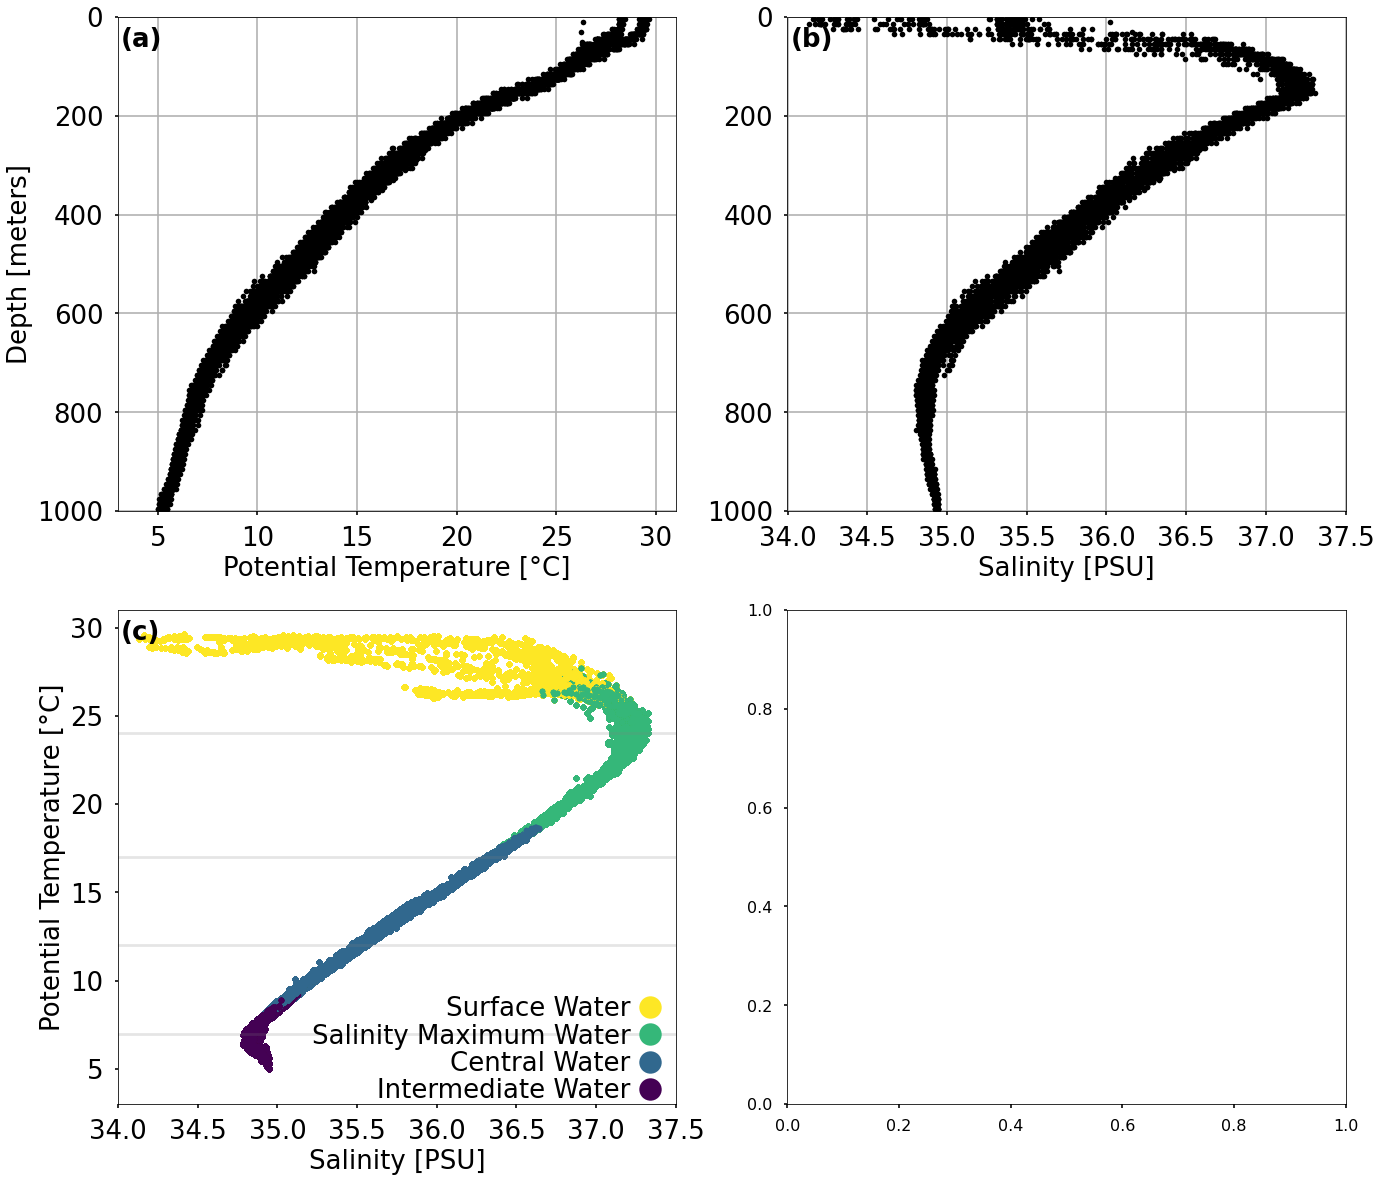

In [13]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
cmap = matplotlib.cm.get_cmap('viridis')

fig, axs = plt.subplots(2, 2, figsize=(22, 20))

font_size = 26

axs[0,0].plot(np.nanmean(grid_ds_2020.temp,axis=(1,2)),grid_ds_2020.depth,'.',color='black')
axs[0,0].plot(grid_ds_2021a.temp,grid_ds_2021a.depth,'.',color='black')
axs[0,0].plot(grid_ds_2021b.temp,grid_ds_2021b.depth,'.',color='black')
axs[0,0].plot(np.nanmean(grid_ds_2022.temp,axis=(1,2)),grid_ds_2022.depth,'.',color='black')
axs[0,0].grid()
axs[0,0].tick_params(axis='both', which='major', labelsize=font_size)
axs[0,0].set_xlabel('Potential Temperature [°C]',fontsize=font_size)
axs[0,0].set_ylabel('Depth [meters]',fontsize=font_size)
axs[0,0].set_xlim(3,31)
axs[0,0].set_ylim(1000,0)
axs[0,0].text(0.005,0.94,'(a)', transform=axs[0,0].transAxes, size=font_size, weight='bold')

axs[0,1].plot(np.nanmean(grid_ds_2020.sal,axis=(1,2)),grid_ds_2020.depth,'.',color='black')
axs[0,1].plot(grid_ds_2021a.sal,grid_ds_2021a.depth,'.',color='black')
axs[0,1].plot(grid_ds_2021b.sal,grid_ds_2021b.depth,'.',color='black')
axs[0,1].plot(np.nanmean(grid_ds_2022.sal,axis=(1,2)),grid_ds_2022.depth,'.',color='black')
axs[0,1].grid()
axs[0,1].tick_params(axis='both', which='major', labelsize=font_size)
axs[0,1].set_xlabel('Salinity [PSU]',fontsize=font_size)
axs[0,1].set_xlim(34,37.5)
axs[0,1].set_ylim(1000,0)
axs[0,1].text(0.005,0.94,'(b)', transform=axs[0,1].transAxes, size=font_size, weight='bold')

axs[1,0].plot(grid_ds_2020.sal.values[surface_ind_2020].flatten(),grid_ds_2020.temp.values[surface_ind_2020].flatten(),'.',label='Surface Water',color=cmap(0.999))
axs[1,0].plot(grid_ds_2020.sal.values[salinity_max_ind_2020].flatten(),grid_ds_2020.temp.values[salinity_max_ind_2020].flatten(),'.',label='Salinity Maximum Water',color=cmap(0.666))
axs[1,0].plot(grid_ds_2020.sal.values[central_water_ind_2020].flatten(),grid_ds_2020.temp.values[central_water_ind_2020].flatten(),'.',label='Central Water',color=cmap(0.333))
axs[1,0].plot(grid_ds_2020.sal.values[int_water_ind_2020].flatten(),grid_ds_2020.temp.values[int_water_ind_2020].flatten(),'.',label='Intermediate Water',color=cmap(0.001))

axs[1,0].plot(grid_ds_2021a.sal.values[surface_ind_2021a].flatten(),grid_ds_2021a.temp.values[surface_ind_2021a].flatten(),'.',color=cmap(0.999))
axs[1,0].plot(grid_ds_2021a.sal.values[salinity_max_ind_2021a].flatten(),grid_ds_2021a.temp.values[salinity_max_ind_2021a].flatten(),'.',color=cmap(0.666))
axs[1,0].plot(grid_ds_2021a.sal.values[central_water_ind_2021a].flatten(),grid_ds_2021a.temp.values[central_water_ind_2021a].flatten(),'.',color=cmap(0.333))
axs[1,0].plot(grid_ds_2021a.sal.values[int_water_ind_2021a].flatten(),grid_ds_2021a.temp.values[int_water_ind_2021a].flatten(),'.',color=cmap(0.001))

axs[1,0].plot(grid_ds_2021b.sal.values[surface_ind_2021b].flatten(),grid_ds_2021b.temp.values[surface_ind_2021b].flatten(),'.',color=cmap(0.999))
axs[1,0].plot(grid_ds_2021b.sal.values[salinity_max_ind_2021b].flatten(),grid_ds_2021b.temp.values[salinity_max_ind_2021b].flatten(),'.',color=cmap(0.6666))
axs[1,0].plot(grid_ds_2021b.sal.values[central_water_ind_2021b].flatten(),grid_ds_2021b.temp.values[central_water_ind_2021b].flatten(),'.',color=cmap(0.333))
axs[1,0].plot(grid_ds_2021b.sal.values[int_water_ind_2021b].flatten(),grid_ds_2021b.temp.values[int_water_ind_2021b].flatten(),'.',color=cmap(0.001))

axs[1,0].plot(grid_ds_2022.sal.values[surface_ind_2022].flatten(),grid_ds_2022.temp.values[surface_ind_2022].flatten(),'.',color=cmap(0.999))
axs[1,0].plot(grid_ds_2022.sal.values[salinity_max_ind_2022].flatten(),grid_ds_2022.temp.values[salinity_max_ind_2022].flatten(),'.',color=cmap(0.6666))
axs[1,0].plot(grid_ds_2022.sal.values[central_water_ind_2022].flatten(),grid_ds_2022.temp.values[central_water_ind_2022].flatten(),'.',color=cmap(0.333))
axs[1,0].plot(grid_ds_2022.sal.values[int_water_ind_2022].flatten(),grid_ds_2022.temp.values[int_water_ind_2022].flatten(),'.',color=cmap(0.001))


axs[1,0].tick_params(axis='both', which='major', labelsize=font_size)
axs[1,0].set_ylabel('Potential Temperature [°C]',fontsize=font_size)
axs[1,0].set_xlabel('Salinity [PSU]',fontsize=font_size)
axs[1,0].set_ylim(3,31)
axs[1,0].set_xlim(34,37.5)    
axs[1,0].axhline(y=24, color='grey', alpha=0.2)
axs[1,0].axhline(y=17, color='grey', alpha=0.2)
axs[1,0].axhline(y=12, color='grey', alpha=0.2)
axs[1,0].axhline(y=7, color='grey', alpha=0.2)
axs[1,0].text(0.005,0.94,'(c)', transform=axs[1,0].transAxes, size=font_size, weight='bold')
axs[1,0].legend(fontsize=font_size,markerscale=4,frameon=False,markerfirst=False,loc='lower right',handletextpad=-0.25, labelspacing=0.05,borderaxespad=-0.4)




## SAW
axs[1,1].scatter(df.saw_sal,df.saw_temp,s=s,label='South Atlantic')
## NAW
axs[1,1].scatter(df.naw_sal,df.naw_temp,s=s,label='North Atlantic')

## markersize
s = 100
axs[1,1].scatter(subset_ds_2020.sal.values,subset_ds_2020.temp.values,s=10,c='black',label='Glider Data')
axs[1,1].scatter(subset_ds_2021a.sal.values,subset_ds_2021a.temp.values,s=10,c='black')
axs[1,1].scatter(subset_ds_2021b.sal.values,subset_ds_2021b.temp.values,s=10,c='black')
axs[1,1].scatter(subset_ds_2022.sal.values,subset_ds_2022.temp.values,s=10,c='black')


axs[1,1].tick_params(axis='both', which='major', labelsize=font_size)
axs[1,1].set_xlabel('Salinity [PSU]',fontsize=font_size)
axs[1,1].set_ylim(3,31)
axs[1,1].set_xlim(34,37.5)

axs[1,1].text(0.005,0.94,'(d)', transform=axs[1,1].transAxes, size=font_size, weight='bold')
lgnd = axs[1,1].legend(fontsize=font_size,frameon=False,loc='lower right',markerfirst=False,handletextpad=-0.25, labelspacing=0.075,borderaxespad=-0.3)
for handle in lgnd.legendHandles:
    handle.set_sizes([500])

######## This plots the contours
mint=1
maxt=30
mins=34
maxs=37.5
tempL=np.linspace(mint-1,maxt+1,399)
salL=np.linspace(mins-1,maxs+1,399)
Tg, Sg = np.meshgrid(tempL,salL)

z=np.linspace(-1000,0,399)
p = gsw.p_from_z(z,lat=0)

sigma_theta = gsw.sigma0(Sg, Tg)+1000

#sigma_theta = gsw.sigma0(Sg, Tg)+1000 # ignore effects of pressure on density
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),399)
ind = np.argwhere(sigma_theta > 1015.7)
st_short = sigma_theta[ind]
cs = axs[1,1].contour(Sg, Tg, sigma_theta, colors='grey', zorder=1 ,levels=[1024.5,1026.3,1026.8,1027.1,1027.6])
levels = cs.levels
manual_locations = [(34.9, 20), (34.5, 12), (37.2,18), (36.9,15), (36.65,12)]
axs[1,1].clabel(cs,levels, fontsize=16,inline=True,fmt='%.1f', manual=manual_locations)


plt.savefig('/home/jg1200/Figures/Anegada_Dominant_Water_Masses_SAW_NAW_End_Members.png', bbox_inches='tight',dpi=300,facecolor='white')



/tmp/ipykernel_37051/3883708082.py:8: RuntimeWarning: Mean of empty slice
  axs[0].plot(np.nanmean(grid_ds_2020.temp,axis=(1,2)),grid_ds_2020.depth,'.',color='black')
/tmp/ipykernel_37051/3883708082.py:20: RuntimeWarning: Mean of empty slice
  axs[1].plot(np.nanmean(grid_ds_2020.sal,axis=(1,2)),grid_ds_2020.depth,'.',color='black')


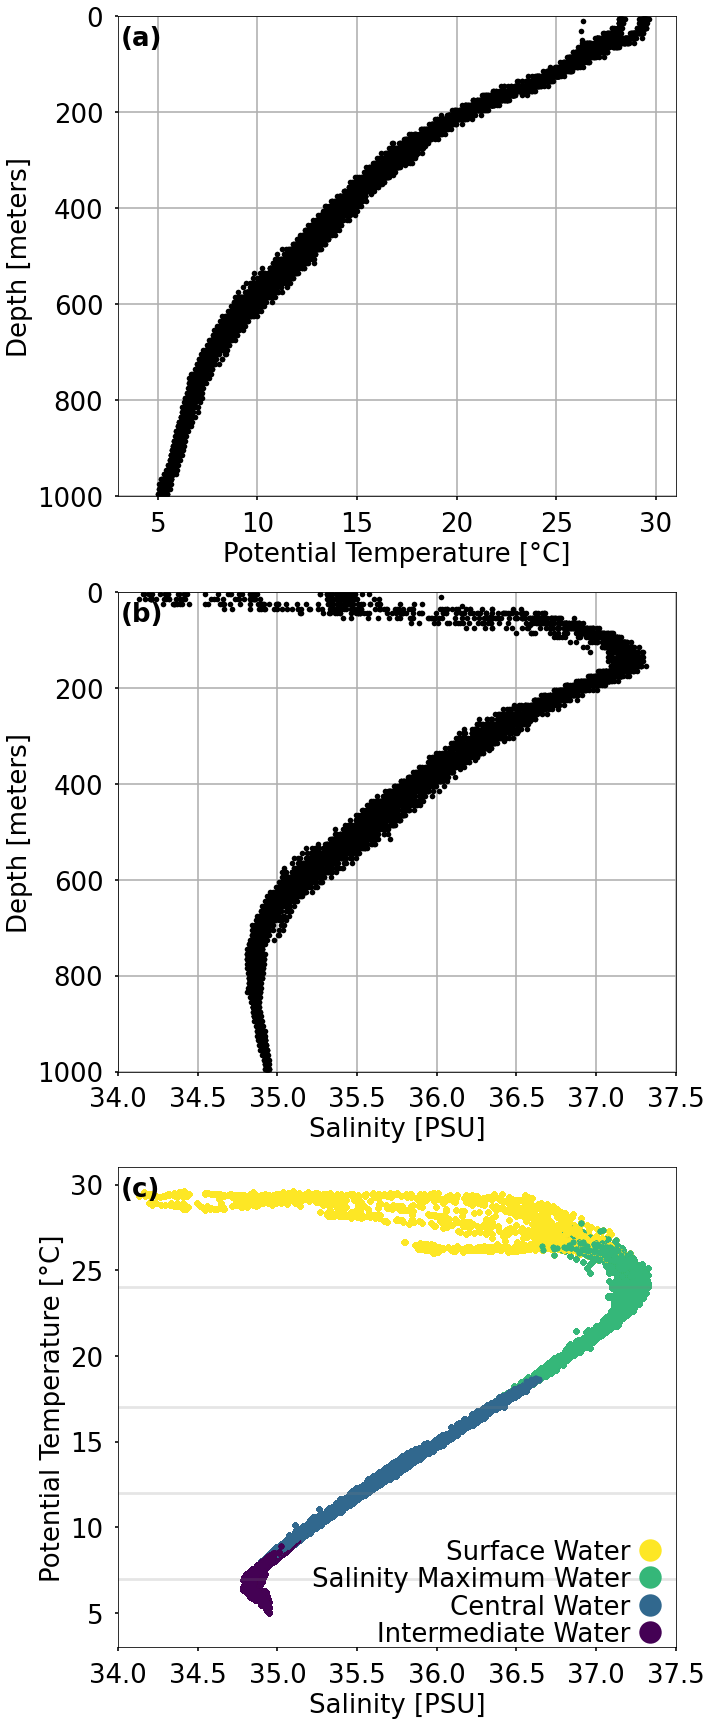

In [14]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
cmap = matplotlib.cm.get_cmap('viridis')

fig, axs = plt.subplots(3, 1, figsize=(10, 30))

font_size = 26

axs[0].plot(np.nanmean(grid_ds_2020.temp,axis=(1,2)),grid_ds_2020.depth,'.',color='black')
axs[0].plot(grid_ds_2021a.temp,grid_ds_2021a.depth,'.',color='black')
axs[0].plot(grid_ds_2021b.temp,grid_ds_2021b.depth,'.',color='black')
axs[0].plot(np.nanmean(grid_ds_2022.temp,axis=(1,2)),grid_ds_2022.depth,'.',color='black')
axs[0].grid()
axs[0].tick_params(axis='both', which='major', labelsize=font_size)
axs[0].set_xlabel('Potential Temperature [°C]',fontsize=font_size)
axs[0].set_ylabel('Depth [meters]',fontsize=font_size)
axs[0].set_xlim(3,31)
axs[0].set_ylim(1000,0)
axs[0].text(0.005,0.94,'(a)', transform=axs[0].transAxes, size=font_size, weight='bold')

axs[1].plot(np.nanmean(grid_ds_2020.sal,axis=(1,2)),grid_ds_2020.depth,'.',color='black')
axs[1].plot(grid_ds_2021a.sal,grid_ds_2021a.depth,'.',color='black')
axs[1].plot(grid_ds_2021b.sal,grid_ds_2021b.depth,'.',color='black')
axs[1].plot(np.nanmean(grid_ds_2022.sal,axis=(1,2)),grid_ds_2022.depth,'.',color='black')
axs[1].grid()
axs[1].tick_params(axis='both', which='major', labelsize=font_size)
axs[1].set_xlabel('Salinity [PSU]',fontsize=font_size)
axs[1].set_ylabel('Depth [meters]',fontsize=font_size)
axs[1].set_xlim(34,37.5)
axs[1].set_ylim(1000,0)
axs[1].text(0.005,0.94,'(b)', transform=axs[1].transAxes, size=font_size, weight='bold')

axs[2].plot(grid_ds_2020.sal.values[surface_ind_2020].flatten(),grid_ds_2020.temp.values[surface_ind_2020].flatten(),'.',label='Surface Water',color=cmap(0.999))
axs[2].plot(grid_ds_2020.sal.values[salinity_max_ind_2020].flatten(),grid_ds_2020.temp.values[salinity_max_ind_2020].flatten(),'.',label='Salinity Maximum Water',color=cmap(0.666))
axs[2].plot(grid_ds_2020.sal.values[central_water_ind_2020].flatten(),grid_ds_2020.temp.values[central_water_ind_2020].flatten(),'.',label='Central Water',color=cmap(0.333))
axs[2].plot(grid_ds_2020.sal.values[int_water_ind_2020].flatten(),grid_ds_2020.temp.values[int_water_ind_2020].flatten(),'.',label='Intermediate Water',color=cmap(0.001))

axs[2].plot(grid_ds_2021a.sal.values[surface_ind_2021a].flatten(),grid_ds_2021a.temp.values[surface_ind_2021a].flatten(),'.',color=cmap(0.999))
axs[2].plot(grid_ds_2021a.sal.values[salinity_max_ind_2021a].flatten(),grid_ds_2021a.temp.values[salinity_max_ind_2021a].flatten(),'.',color=cmap(0.666))
axs[2].plot(grid_ds_2021a.sal.values[central_water_ind_2021a].flatten(),grid_ds_2021a.temp.values[central_water_ind_2021a].flatten(),'.',color=cmap(0.333))
axs[2].plot(grid_ds_2021a.sal.values[int_water_ind_2021a].flatten(),grid_ds_2021a.temp.values[int_water_ind_2021a].flatten(),'.',color=cmap(0.001))

axs[2].plot(grid_ds_2021b.sal.values[surface_ind_2021b].flatten(),grid_ds_2021b.temp.values[surface_ind_2021b].flatten(),'.',color=cmap(0.999))
axs[2].plot(grid_ds_2021b.sal.values[salinity_max_ind_2021b].flatten(),grid_ds_2021b.temp.values[salinity_max_ind_2021b].flatten(),'.',color=cmap(0.6666))
axs[2].plot(grid_ds_2021b.sal.values[central_water_ind_2021b].flatten(),grid_ds_2021b.temp.values[central_water_ind_2021b].flatten(),'.',color=cmap(0.333))
axs[2].plot(grid_ds_2021b.sal.values[int_water_ind_2021b].flatten(),grid_ds_2021b.temp.values[int_water_ind_2021b].flatten(),'.',color=cmap(0.001))

axs[2].plot(grid_ds_2022.sal.values[surface_ind_2022].flatten(),grid_ds_2022.temp.values[surface_ind_2022].flatten(),'.',color=cmap(0.999))
axs[2].plot(grid_ds_2022.sal.values[salinity_max_ind_2022].flatten(),grid_ds_2022.temp.values[salinity_max_ind_2022].flatten(),'.',color=cmap(0.6666))
axs[2].plot(grid_ds_2022.sal.values[central_water_ind_2022].flatten(),grid_ds_2022.temp.values[central_water_ind_2022].flatten(),'.',color=cmap(0.333))
axs[2].plot(grid_ds_2022.sal.values[int_water_ind_2022].flatten(),grid_ds_2022.temp.values[int_water_ind_2022].flatten(),'.',color=cmap(0.001))


axs[2].tick_params(axis='both', which='major', labelsize=font_size)
axs[2].set_ylabel('Potential Temperature [°C]',fontsize=font_size)
axs[2].set_xlabel('Salinity [PSU]',fontsize=font_size)
axs[2].set_ylim(3,31)
axs[2].set_xlim(34,37.5)    
axs[2].axhline(y=24, color='grey', alpha=0.2)
axs[2].axhline(y=17, color='grey', alpha=0.2)
axs[2].axhline(y=12, color='grey', alpha=0.2)
axs[2].axhline(y=7, color='grey', alpha=0.2)
axs[2].text(0.005,0.94,'(c)', transform=axs[2].transAxes, size=font_size, weight='bold')
axs[2].legend(fontsize=font_size,markerscale=4,frameon=False,markerfirst=False,loc='lower right',handletextpad=-0.25, labelspacing=0.05,borderaxespad=-0.4)


plt.savefig('/home/jg1200/Figures/Anegada_Dominant_Water_Masses.png', bbox_inches='tight',dpi=300,facecolor='white')



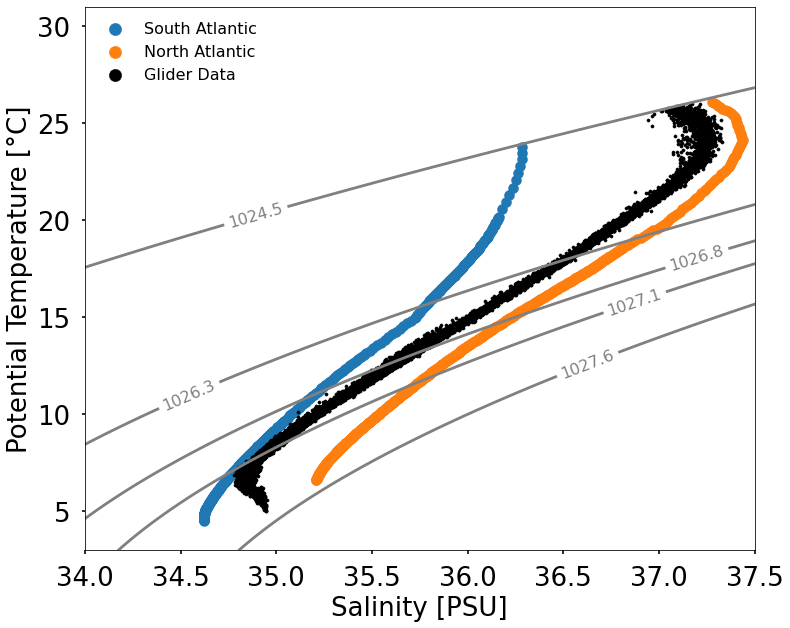

In [15]:
 plt.figure(figsize=(12, 10))

font_size = 26

s = 100

## SAW
plt.scatter(df.saw_sal,df.saw_temp,s=s,label='South Atlantic')
## NAW
plt.scatter(df.naw_sal,df.naw_temp,s=s,label='North Atlantic')

## markersize
plt.scatter(subset_ds_2020.sal.values,subset_ds_2020.temp.values,s=10,c='black',label='Glider Data')
plt.scatter(subset_ds_2021a.sal.values,subset_ds_2021a.temp.values,s=10,c='black')
plt.scatter(subset_ds_2021b.sal.values,subset_ds_2021b.temp.values,s=10,c='black')
plt.scatter(subset_ds_2022.sal.values,subset_ds_2022.temp.values,s=10,c='black')


plt.gca().tick_params(axis='both', which='major', labelsize=font_size)
plt.ylabel('Potential Temperature [°C]',fontsize=font_size)
plt.xlabel('Salinity [PSU]',fontsize=font_size)
plt.ylim(3,31)
plt.xlim(34,37.5)

# lgnd = axs[1,1].legend(fontsize=font_size,frameon=False,loc='lower right',markerfirst=False,handletextpad=-0.25, labelspacing=0.075,borderaxespad=-0.3)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([500])

######## This plots the contours
mint=1
maxt=30
mins=34
maxs=37.5
tempL=np.linspace(mint-1,maxt+1,399)
salL=np.linspace(mins-1,maxs+1,399)
Tg, Sg = np.meshgrid(tempL,salL)

z=np.linspace(-1000,0,399)
p = gsw.p_from_z(z,lat=0)

sigma_theta = gsw.sigma0(Sg, Tg)+1000

#sigma_theta = gsw.sigma0(Sg, Tg)+1000 # ignore effects of pressure on density
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),399)
ind = np.argwhere(sigma_theta > 1015.7)
st_short = sigma_theta[ind]
cs = plt.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1 ,levels=[1024.5,1026.3,1026.8,1027.1,1027.6])
levels = cs.levels
manual_locations = [(34.9, 20), (34.5, 12), (37.2,18), (36.9,15), (36.65,12)]
plt.clabel(cs,levels, fontsize=16,inline=True,fmt='%.1f', manual=manual_locations)

lgnd = plt.legend(frameon=False,loc='upper left')
for handle in lgnd.legendHandles:
    handle.set_sizes([150])


plt.savefig('/home/jg1200/Figures/Anegada_SAW_NAW_End_Members.png', bbox_inches='tight',dpi=300,facecolor='white')



## Plot transport per temperature class

In [ ]:
ranges2020 = pd.read_csv('/home/jg1200/Data/GliderData/RU29/transport_per_temperature_class_2020.csv')
## Saved in a weird format
ranges2020 = np.array(ranges2020)[0][1:]

ranges2021a = pd.read_csv('/home/jg1200/Data/GliderData/RU29/transport_per_temperature_class_jul_2021.csv')
## Saved in a weird format
ranges2021a = np.array(ranges2021a)[0][1:]


ranges2021b = pd.read_csv('/home/jg1200/Data/GliderData/RU29/transport_per_temperature_class_sep_2021.csv')
## Saved in a weird format
ranges2021b = np.array(ranges2021b)[0][1:]

ranges2022 = pd.read_csv('/home/jg1200/Data/GliderData/RU36/transport_per_temperature_class_2022.csv')
## Saved in a weird format
ranges2022 = np.array(ranges2022)[0][1:]

In [ ]:
#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (12,12))

range_names = ['<7\N{DEGREE SIGN}', '7-12\N{DEGREE SIGN}', '12-17\N{DEGREE SIGN}', '17-24\N{DEGREE SIGN}', '>24\N{DEGREE SIGN}']
#use this to create x ticks to add the data to
y = np.array((0,2,4,6,8))
height = 0.4

# oct_2020_color = '#0077BB'
# jul_2021_color = '#BB5566'
# sep_2021_color = '#DDAA33'
# mar_2022_color = '#009988'

font_size = 22

oct_2020_color = '#004488'
jul_2021_color = '#CC3311'
sep_2021_color = '#EE7733'
mar_2022_color = '#33BBEE'

rect1 = ax.barh(y+0.6, ranges2022, height = height, label = 'Mar-2022', color=mar_2022_color, edgecolor='black', linewidth=1.2)
rect2 = ax.barh(y+0.2, ranges2021b, height = height, label = 'Sep-2021', color=sep_2021_color, edgecolor='black', linewidth=1.2)
rect3 = ax.barh(y-0.2, ranges2021a, height = height, label = 'Jul-2021', color=jul_2021_color, edgecolor='black', linewidth=1.2)
rect4 = ax.barh(y-0.6, ranges2020, height = height, label = 'Oct-2020',    color=oct_2020_color, edgecolor='black', linewidth=1.2)

ax.set_yticks(y)
ax.set_yticklabels(range_names)
plt.xlabel('Mean Transport [Sv]', fontsize = font_size)
plt.gca().yaxis.tick_right()
ax.tick_params(labelsize=font_size) 


# ###### To change the order of elements plotted in legend so it is chronological
# #get handles and labels
# handles, labels = plt.gca().get_legend_handles_labels()

# #specify order of items in legend
# order = [3,2,1,0]

# #add legend to plot
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False, loc='lower left') 

plt.legend(frameon=False, loc='lower left', fontsize = font_size)

plt.savefig('/home/jg1200/Figures/All_Deployments_Transport_Temperature_Layers_Colored.png',dpi=300,facecolor='white',bbox_inches='tight')


In [ ]:
def calc_saw_percentages(df):
    return(df[1]+(df[2]*0.25)+(df[3]*0.25)+df[4])
    

In [ ]:
calc_saw_percentages(ranges2020)

In [ ]:
calc_saw_percentages(ranges2021a)

In [ ]:
calc_saw_percentages(ranges2021b)

In [ ]:
calc_saw_percentages(ranges2022)

In [ ]:
1.25/0.58

In [ ]:
2.41/1.43

In [ ]:
2.63/1.96

In [ ]:
1.36/0.47